# A brief matplot API primer

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime
import io
%matplotlib inline

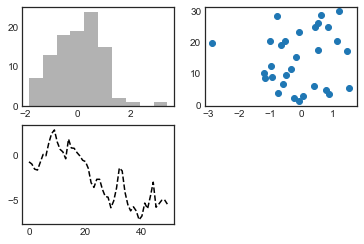

In [21]:
sns.set_style('white')
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(np.random.randn(50).cumsum(),'k--')
_ = ax1.hist(np.random.randn(100),color = 'k',alpha = 0.3)
ax2.scatter(np.random.randn(30),np.arange(30) + 3 * np.random.randn(30))

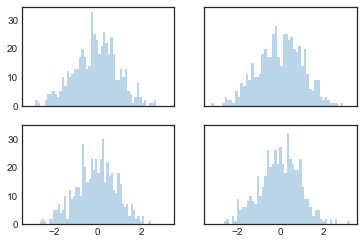

In [26]:
fig,axes = plt.subplots(nrows = 2,ncols = 2, sharex = True,sharey = True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins = 50,alpha = 0.3)

plt.subplots_adjust(wspace = 0,hsapce = 0) # 子图之间的空隙大小

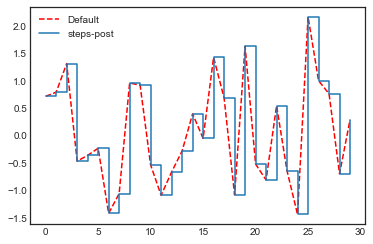

In [31]:
data1 = np.random.randn(30)
plt.plot(data1,color = 'r',label = 'Default',linestyle = '--')
plt.plot(data1,drawstyle = 'steps-post',label = 'steps-post')
plt.legend(loc = 'best')

Text(0.5,0,'Stage')

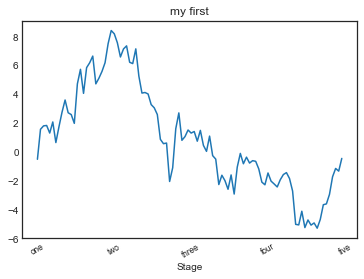

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(100).cumsum())
ticks = ax.set_xticks([0,25,50,75,100])
ticklabels = ax.set_xticklabels(['one','two','three','four','five'],
                               rotation = 30,fontsize = 'small')
ax.set_title('my first')
ax.set_xlabel('Stage')

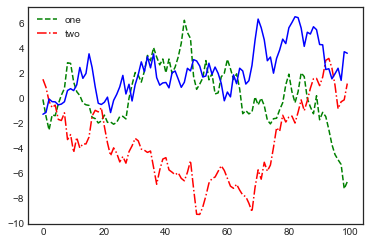

In [41]:
ax = plt.subplot(1,1,1)
ax.plot(np.random.randn(100).cumsum(),color = 'g',linestyle = '--',label = 'one')
ax.plot(np.random.randn(100).cumsum(),color = 'r',linestyle = '-.',label = 'two')
ax.plot(np.random.randn(100).cumsum(),color = 'b',label = '_nolegend_')
ax.legend()

In [68]:
spx.head()

1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
Name: SPX, dtype: float64

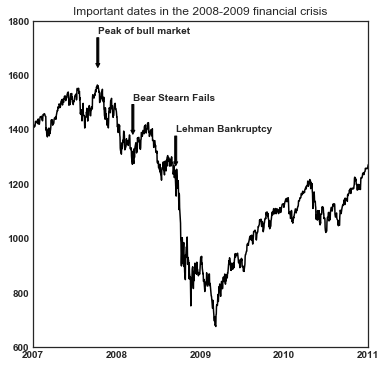

In [117]:
sns.set_style('white')
ax = plt.subplot(1,1,1)
data = pd.read_csv('examples\\spx.csv',index_col = 0,parse_dates = True)
spx = data['SPX']
ax.plot(spx,linestyle = '-',color = 'k')
crisis_data = [(datetime.datetime(2007,10,11),'Peak of bull market'),
              (datetime.datetime(2008,3,12),'Bear Stearn Fails'),
              (datetime.datetime(2008,9,15),'Lehman Bankruptcy')]
for date, label in crisis_data:
    ax.annotate(label,xy=(date,spx.asof(date) + 75),
                xytext=(date,spx.asof(date) + 225),
                arrowprops = dict(facecolor = 'black',headwidth = 4,width = 2,
                                 headlength = 4),
               horizontalalignment = 'left',verticalalignment = 'top')

ax.set(**{
    'title':'Important dates in the 2008-2009 financial crisis',
    'xlim':['1/1/2007','1/1/2011'],
    'ylim':[600,1800],
    'xticks':[datetime.datetime(x,1,1) for x in range(2007,2012)],
    'xticklabels':['{}'.format(x) for x in range(2007,2012)]
        });
#ax.set_xticks([datetime.datetime(x,1,1) for x in range(2007,2012)])
#ax.set_xticklabels(labels = ['{}'.format(x) for x in range(2007,2012)],
   # rotation=0)

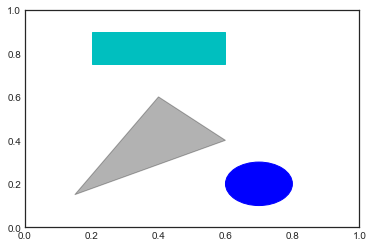

In [102]:
ax = plt.subplot(1,1,1)
rect = plt.Rectangle((0.2,0.75),0.4,0.15,color = 'c',alpha = 1) # j矩形
ax.add_patch(rect)

circ = plt.Circle((0.7,0.2),0.1,color = 'b') # 圆、椭圆，alpha 颜色深浅
ax.add_patch(circ)

pgon = plt.Polygon([[0.15,0.15],[0.6,0.4],[0.4,0.6]],color = 'k',alpha = 0.3) #三角形
ax.add_patch(pgon)

# buffer = io.BytesIO() 保存成其它格式
plt.savefig('examples\\111.jpg',dpi = 300,facecolor = 'w')
# buffer.getvalue()

In [116]:
plt.rc('figure',figsize = (6,6))
plt.rc('font',**{'family':'monospace','weight':'bold'}) 
# 修改了所有的图形，包括不在则会个cell中的

# Plotting with pandas and seaborn

## 折线图

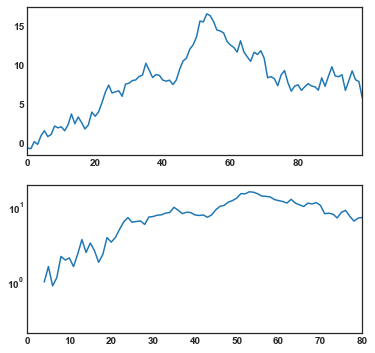

In [136]:
fig,ax = plt.subplots(nrows = 2,ncols = 1)
s = pd.Series(np.random.randn(100).cumsum())
s.plot(use_index = False,ax = ax[0])

s.plot(ax = ax[1],xlim = [0,80],logy = True)

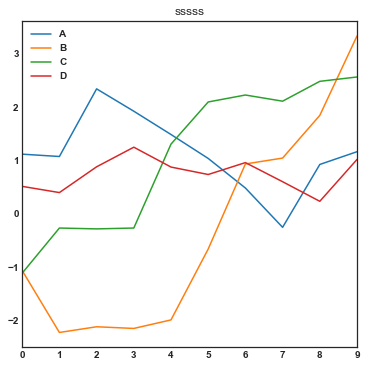

In [146]:
df1 = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                  columns = list('ABCD'))
df1.plot(label = '_nolegend_',
         title = 'sssss')

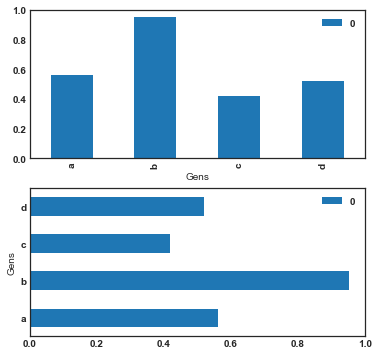

In [151]:
fig,ax = plt.subplots(nrows = 2,ncols = 1)
df2 = pd.DataFrame(np.random.rand(4),
                   index = pd.Index(['a','b','c','d'],name = 'Gens'))
df2.plot.bar(ax = ax[0])
df2.plot.barh(ax = ax[1])

## 柱状图

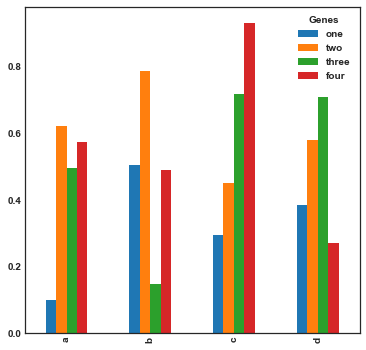

In [153]:
df3 = pd.DataFrame(np.random.rand(4,4),
                  index = list('abcd'),
                  columns = pd.Index(['one','two','three','four'],name = 'Genes'))
df3.plot.bar()

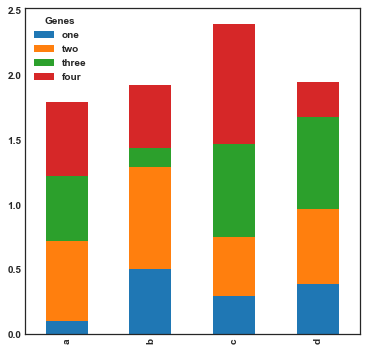

In [154]:
df3.plot.bar(stacked = True) # stacked 是否堆积

In [155]:
tips = pd.read_csv('examples\\tips.csv')
party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


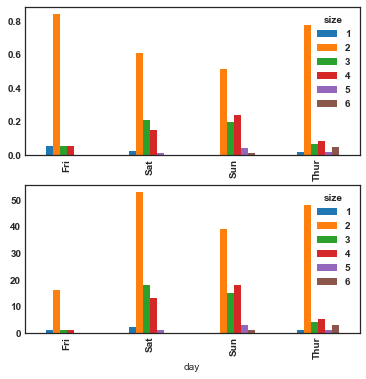

In [164]:
fig ,axes = plt.subplots(nrows = 2,ncols = 1)
party_counts.div(party_counts.sum(1),axis = 0).plot.bar(ax = axes[0])

party_counts.plot.bar(ax = axes[1])

In [167]:
tips['tip_pct'] = tips['tip'].div(tips['total_bill'])
tips.sample(8)

,total_bill,tip,smoker,day,time,size,tip_pct
28,21.70,4.30,No,Sat,Dinner,2,0.198157
15,21.58,3.92,No,Sun,Dinner,2,0.181650
22,15.77,2.23,No,Sat,Dinner,2,0.141408
78,22.76,3.00,No,Thur,Lunch,2,0.131810
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
150,14.07,2.50,No,Sun,Dinner,2,0.177683
7,26.88,3.12,No,Sun,Dinner,4,0.116071
160,21.50,3.50,No,Sun,Dinner,4,0.162791


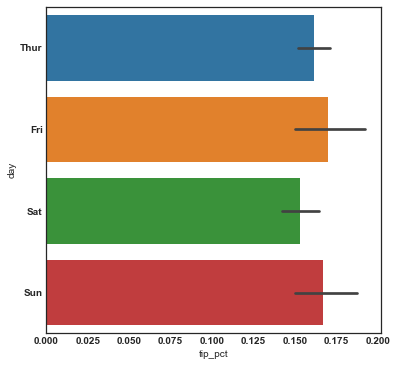

In [183]:
sns.barplot(x = 'tip_pct',y = 'day',data = tips,orient = 'h',
           order = ['Thur','Fri','Sat','Sun'],
           ci = 95 ) # 在星期五和星期天，小费给的比例较高

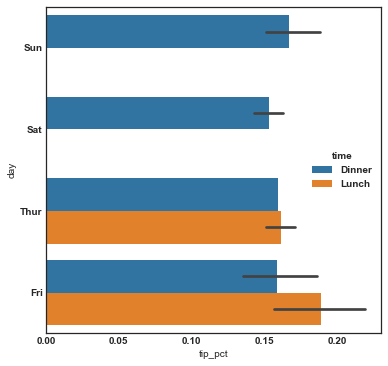

In [184]:
sns.barplot(x = 'tip_pct',y = 'day',data = tips,
           orient = 'h',
           ci = 95,
           hue  = 'time')

## 直方图

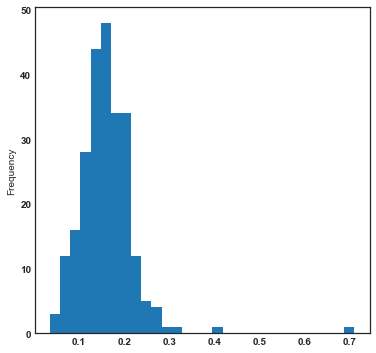

In [185]:
tips['tip_pct'].plot.hist(bins = 30) # 得出大多数小费占10% ~ 20%之间

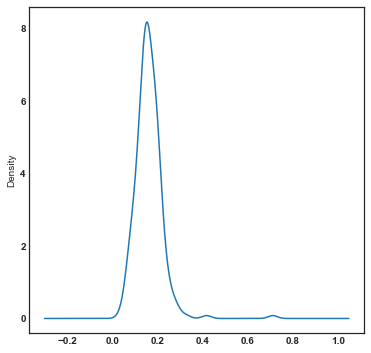

In [186]:
tips['tip_pct'].plot.density() # 和.kde一样

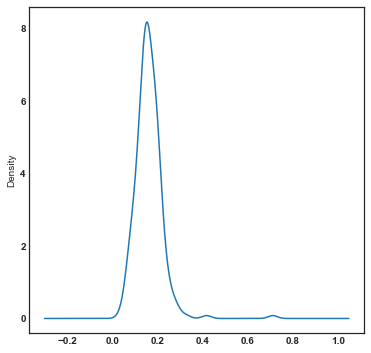

In [187]:
tips['tip_pct'].plot.kde()

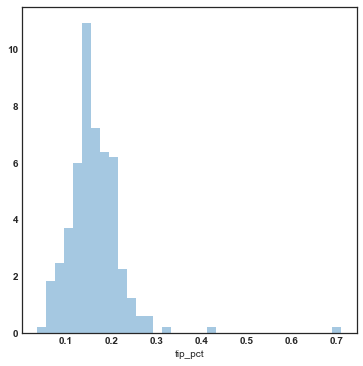

In [204]:
sns.distplot(a = tips['tip_pct'],norm_hist = True,kde = False)

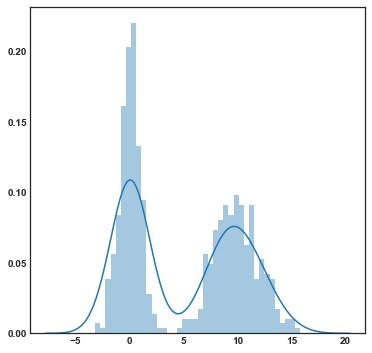

In [215]:
sns.distplot(a = pd.Series(np.concatenate([np.random.randn(300),
                                 np.random.normal(10,2,size = 300)])),bins = 40)

## scatter or point plot

In [216]:
df4 = pd.read_csv('examples\\macrodata.csv')

In [217]:
df5 = df4[['cpi','m1','tbilrate','unemp']]

In [218]:
df6 = np.log(df5).diff().dropna() # diff 计算一个数和前面数的差

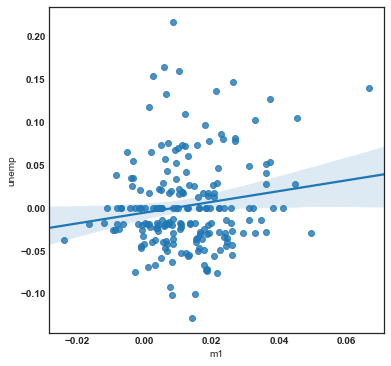

In [220]:
sns.regplot(x = 'm1',y = 'unemp',data = df6) # 回归图

## pairplot

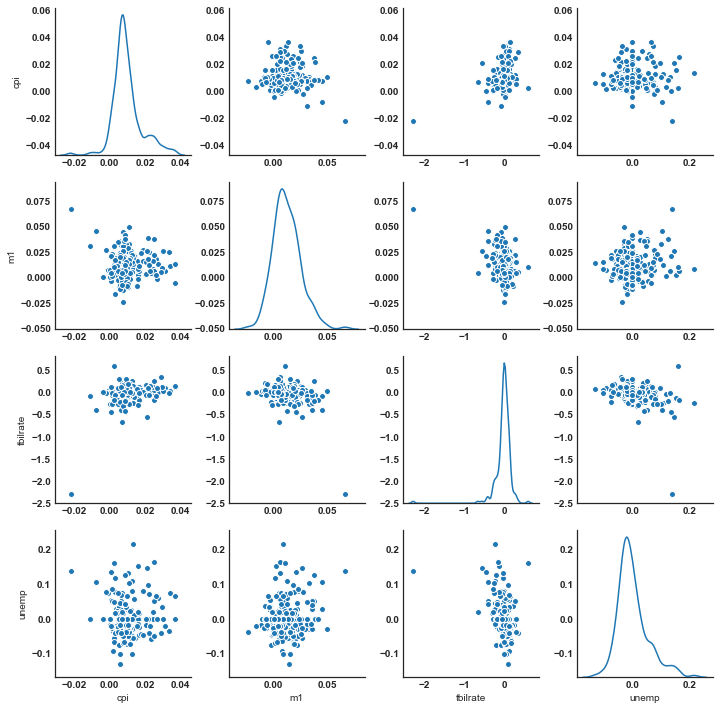

In [230]:
sns.pairplot(data = df6,diag_kind = 'kde',
            kind = 'scatter') # 默认kind是scater，即散点图
                          # 一次性把所有feature(列)两两之间的关系都画出来了
                         # plot_kws 传入kind 图的参数

## facet gird

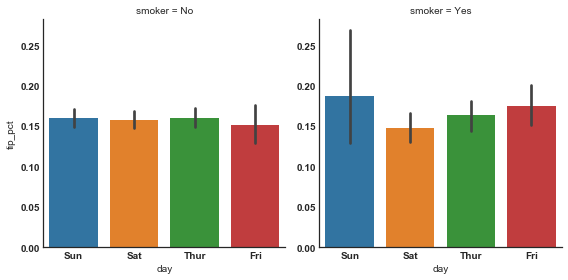

In [233]:
sns.factorplot(x='day',y='tip_pct',col = 'smoker',kind = 'bar',data = tips)
# 可以得出不吸烟的人在工作日、周末小费比例差异不大
# 吸烟者更敏感

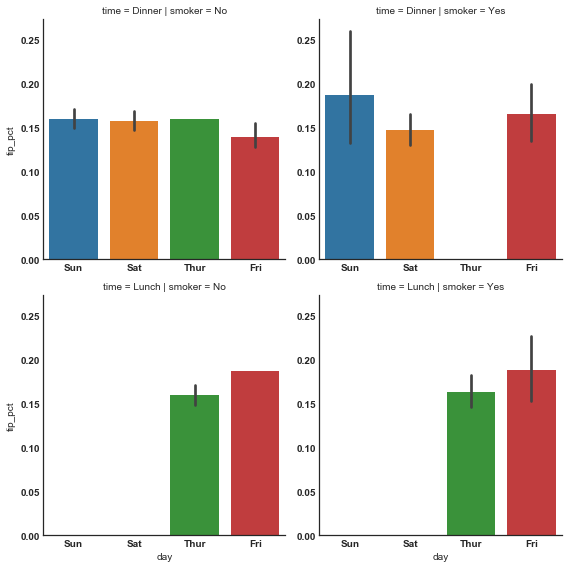

In [234]:
sns.factorplot(x = 'day',y = 'tip_pct',row = 'time',col = 'smoker',
              kind = 'bar',data = tips)

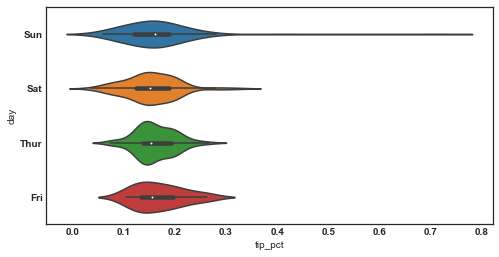

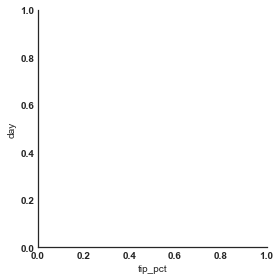

In [256]:
fig = plt.figure(figsize = (8,4))
ax = fig.add_subplot(1,1,1)
sns.factorplot(y = 'day',x = 'tip_pct',kind = 'violin',data = tips,ax = ax)